In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import unicodedata
import re

In [2]:
swings_2024 = pd.read_csv("swings_2024_outlier_added.csv", index_col = 0)

In [7]:
swings_2024

pitch_type   game_date  release_speed       player_name  batter  \
0              FF  2024-09-30           94.2       Díaz, Edwin  621566   
1              CU  2024-09-30           86.4   Johnson, Pierce  596019   
2              SL  2024-09-30           89.7       Díaz, Edwin  542303   
3              SL  2024-09-30           89.5       Díaz, Edwin  542303   
4              FF  2024-09-30           96.9       Díaz, Edwin  542303   
...           ...         ...            ...               ...     ...   
196956         SI  2024-04-03           92.3     Keller, Mitch  682928   
196957         FF  2024-04-03           92.4     Keller, Mitch  682928   
196958         CH  2024-04-03           83.3  Williams, Trevor  668804   
196959         CH  2024-04-03           82.5  Williams, Trevor  665833   
196960         CH  2024-04-03           83.1  Williams, Trevor  665833   

        pitcher     events      description  \
0        621242  field_out    hit_into_play   
1        572955   home_run    hit_into_play   
2        621242  strikeout  swinging_strike   
3        621242        NaN  swinging_strike   
4        621242        NaN             foul   
...         ...        ...              ...   
196956   656605  field_out    hit_into_play   
196957   656605        NaN             foul   
196958   592866  field_out    hit_into_play   
196959   592866  strikeout  swinging_strike   
196960   592866        NaN             foul   

                                                      des  zone  ...  \
0       Matt Olson pops out to shortstop Francisco Lin...  12.0  ...   
1       Francisco Lindor homers (33) on a fly ball to ...   8.0  ...   
2                     Marcell Ozuna strikes out swinging.   6.0  ...   
3                     Marcell Ozuna strikes out swinging.  14.0  ...   
4                     Marcell Ozuna strikes out swinging.   5.0  ...   
...                                                   ...   ...  ...   
196956  CJ Abrams pops out to third baseman Ke'Bryan H...   2.0  ...   
196957  CJ Abrams pops out to third baseman Ke'Bryan H...   2.0  ...   
196958  Bryan Reynolds lines out to right fielder Lane...   5.0  ...   
196959                   Oneil Cruz strikes out swinging.  13.0  ...   
196960                   Oneil Cruz strikes out swinging.  13.0  ...   

       estimated_woba_using_speedangle woba_value arm_angle bat_speed  \
0                                0.039        0.0      17.8      77.4   
1                                1.621        2.0      39.4      80.2   
2                                0.000        0.0      25.3      78.4   
3                                  NaN        NaN      22.1      79.5   
4                                  NaN        NaN      18.4      77.4   
...                                ...        ...       ...       ...   
196956                           0.003        0.0      31.7      64.2   
196957                             NaN        NaN      31.5      66.8   
196958                           0.439        0.0      15.5      70.9   
196959                           0.000        0.0      14.8      82.1   
196960                             NaN        NaN      15.8      81.3   

        swing_length  bat_speed_pred  swing_length_pred  bat_speed_residual  \
0                7.0       72.630213           6.851235            4.769787   
1                8.1       73.566324           7.948831            6.633676   
2                8.1       74.373570           7.287232            4.026430   
3                8.5       69.598224           8.102444            9.901776   
4                8.0       73.445847           6.833112            3.954153   
...              ...             ...                ...                 ...   
196956           6.2       67.746497           6.518272           -3.546497   
196957           6.0       69.811933           6.778951           -3.011933   
196958           7.2       71.598932           6.546403           -0.698932   
196959           8.5 

In [4]:
from baseball_utilities.display import *
set_pandas_display_all()

In [3]:
from baseball_utilities.data import *
fangraphs_batting_min_400_2024 = get_table("fangraphs_batting_min_400_2024")
pbp_2024 = get_table("statcast_2024")

In [2]:
swings_2024 = pd.read_csv("swings_2024_outlier_added.csv", index_col = 0)

In [4]:
swings_2024 = swings_2024.merge(
    pbp_2024[['batter', 'batter_name']].drop_duplicates(),
    on='batter',
    how='left'
)

In [5]:
swings_2024

pitch_type   game_date  release_speed       player_name  batter  \
0              FF  2024-09-30           94.2       Díaz, Edwin  621566   
1              CU  2024-09-30           86.4   Johnson, Pierce  596019   
2              SL  2024-09-30           89.7       Díaz, Edwin  542303   
3              SL  2024-09-30           89.5       Díaz, Edwin  542303   
4              FF  2024-09-30           96.9       Díaz, Edwin  542303   
...           ...         ...            ...               ...     ...   
196956         SI  2024-04-03           92.3     Keller, Mitch  682928   
196957         FF  2024-04-03           92.4     Keller, Mitch  682928   
196958         CH  2024-04-03           83.3  Williams, Trevor  668804   
196959         CH  2024-04-03           82.5  Williams, Trevor  665833   
196960         CH  2024-04-03           83.1  Williams, Trevor  665833   

        pitcher     events      description  \
0        621242  field_out    hit_into_play   
1        572955   home_run    hit_into_play   
2        621242  strikeout  swinging_strike   
3        621242        NaN  swinging_strike   
4        621242        NaN             foul   
...         ...        ...              ...   
196956   656605  field_out    hit_into_play   
196957   656605        NaN             foul   
196958   592866  field_out    hit_into_play   
196959   592866  strikeout  swinging_strike   
196960   592866        NaN             foul   

                                                      des  zone  ...  \
0       Matt Olson pops out to shortstop Francisco Lin...  12.0  ...   
1       Francisco Lindor homers (33) on a fly ball to ...   8.0  ...   
2                     Marcell Ozuna strikes out swinging.   6.0  ...   
3                     Marcell Ozuna strikes out swinging.  14.0  ...   
4                     Marcell Ozuna strikes out swinging.   5.0  ...   
...                                                   ...   ...  ...   
196956  CJ Abrams pops out to third baseman Ke'Bryan H...   2.0  ...   
196957  CJ Abrams pops out to third baseman Ke'Bryan H...   2.0  ...   
196958  Bryan Reynolds lines out to right fielder Lane...   5.0  ...   
196959                   Oneil Cruz strikes out swinging.  13.0  ...   
196960                   Oneil Cruz strikes out swinging.  13.0  ...   

       bat_speed swing_length bat_speed_pred swing_length_pred  \
0           77.4          7.0      72.630213          6.851235   
1           80.2          8.1      73.566324          7.948831   
2           78.4          8.1      74.373570          7.287232   
3           79.5          8.5      69.598224          8.102444   
4           77.4          8.0      73.445847          6.833112   
...          ...          ...            ...               ...   
196956      64.2          6.2      67.746497          6.518272   
196957      66.8          6.0      69.811933          6.778951   
196958      70.9          7.2      71.598932          6.546403   
196959      82.1          8.5      73.092508          8.483885   
196960      81.3          8.6      74.307867          8.540348   

        bat_speed_residual  swing_length_residual  bat_speed_residual_scaled  \
0                 4.769787               0.148765                   0.778840   
1                 6.633676               0.151169                   1.083187   
2                 4.026430               0.812768                   0.657460   
3                 9.901776               0.397556                   1.616823   
4                 3.954153               1.166888                   0.645658   
...                    ...                    ...                        ...   
196956           -3.546497              -0.318272                  -0.579094   
196957           -3.011933              -0.778951                  -0.491807   
196958           -0.698932               0.653597                  -0.114126   
196959            9.007492               0.016115                   1.470798   
196960         

In [7]:
batter_outlier_avg = (
    swings_2024
    .groupby(["batter", "batter_name"])
    .agg(
        total_outlier_prob=("outlier_prob", "sum"),
        num_swings=("batter", "size")
    )
    .assign(avg_outlier_prob=lambda df: df["total_outlier_prob"] / df["num_swings"])
    .sort_values("avg_outlier_prob", ascending=False)
)
batter_outlier_avg = batter_outlier_avg.reset_index()

In [8]:
batter_outlier_avg["avg_outlier_prob"] = batter_outlier_avg["avg_outlier_prob"].round(3)

In [9]:
batter_outlier_avg.head(25)

batter        batter_name  total_outlier_prob  num_swings  \
0   670032        Nicky Lopez             167.117         711   
1   650490         Yandy Díaz             229.845         992   
2   660821      Jesús Sánchez             209.770         982   
3   680977    Brendan Donovan             189.005         999   
4   681351      Logan O'Hoppe             175.684         949   
5   657077       Alex Verdugo             171.614         933   
6   657041        Lane Thomas             155.470         858   
7   665926     Andrés Giménez             214.277        1219   
8   670623      Isaac Paredes             198.118        1187   
9   606115      Orlando Arcia             172.929        1039   
10  676609     José Caballero             137.187         832   
11  600869  Jeimer Candelario             134.546         834   
12  680777       Ryan Jeffers             133.962         833   
13  664983      Jake McCarthy             125.709         800   
14  663616     Trevor Larnach             105.203         674   
15  457705   Andrew McCutchen             128.591         849   
16  641933      Tyler O'Neill             118.667         809   
17  571448      Nolan Arenado             151.908        1091   
18  671732    Lawrence Butler             110.528         798   
19  665750      Leody Taveras             122.784         899   
20  641487     J. P. Crawford              97.712         718   
21  668227    Randy Arozarena             143.779        1069   
22  664056     Harrison Bader              94.471         713   
23  683737      Michael Busch             133.787        1010   
24  595777   Jurickson Profar             139.079        1078   

    avg_outlier_prob  
0              0.235  
1              0.232  
2              0.214  
3              0.189  
4              0.185  
5              0.184  
6              0.181  
7              0.176  
8              0.167  
9              0.166  
10             0.165  
11             0.161  
12             0.161  
13             0.157  
14             0.156  
15             0.151  
16             0.147  
17             0.139  
18             0.139  
19             0.137  
20             0.136  
21             0.134  
22             0.132  
23             0.132  
24             0.129

In [17]:
batter_outlier_avg.tail(25)

batter        batter_name  total_outlier_prob  num_swings  \
182  650402     Gleyber Torres              63.613        1194   
183  660688       Keibert Ruiz              43.154         811   
184  665489  Vladimir Guerrero              60.612        1150   
185  593428    Xander Bogaerts              36.978         713   
186  519317  Giancarlo Stanton              40.116         783   
187  669016      Brandon Marsh              38.340         775   
188  592450        Aaron Judge              53.960        1107   
189  573262   Mike Yastrzemski              40.409         835   
190  642715       Willy Adames              62.745        1307   
191  645277       Ozzie Albies              39.522         838   
192  668715      Spencer Steer              51.634        1100   
193  608324       Alex Bregman              46.398        1000   
194  521692     Salvador Pérez              58.529        1262   
195  656775     Cedric Mullins              41.563         905   
196  669707       Jared Triolo              35.225         769   
197  647304        Josh Naylor              49.449        1090   
198  592206   Nick Castellanos              57.204        1262   
199  608369       Corey Seager              40.459         904   
200  657557        Paul DeJong              44.342        1030   
201  670541     Yordan Álvarez              41.047        1000   
202  656811       Ryan O'Hearn              34.400         859   
203  682985       Riley Greene              38.479         981   
204  682998     Corbin Carroll              37.976         998   
205  664728         Kyle Isbel              22.630         670   
206  668939    Adley Rutschman              26.662        1090   

     avg_outlier_prob  
182             0.053  
183             0.053  
184             0.053  
185             0.052  
186             0.051  
187             0.049  
188             0.049  
189             0.048  
190             0.048  
191             0.047  
192             0.047  
193             0.046  
194             0.046  
195             0.046  
196             0.046  
197             0.045  
198             0.045  
199             0.045  
200             0.043  
201             0.041  
202             0.040  
203             0.039  
204             0.038  
205             0.034  
206             0.024

## Stat Correlations

In [10]:
from baseball_utilities.display import *
set_pandas_display_all()

In [11]:
fangraphs_batting_min_400_2024

IDfg  Season                   Name   Team  Age    G   AB   PA    H  \
0    24816    2024             Andy Pages    LAD   23  116  403  443  100   
1    24488    2024          Max Schuemann    OAK   27  133  396  459   87   
2    22857    2024          Wenceel Perez    DET   24  112  389  425   94   
3    23565    2024        Davis Schneider    TOR   25  135  397  454   76   
4    19339    2024            Nicky Lopez    CHW   29  124  398  445   96   
5    18882    2024           Brandon Lowe    TBR   29  107  385  425   94   
6    28806    2024        Jackson Chourio    MIL   20  148  528  573  145   
7    25764    2024         Bobby Witt Jr.    KCR   24  161  636  709  211   
8    13590    2024           Jesse Winker  - - -   30  145  430  508  109   
9    26288    2024        Adley Rutschman    BAL   26  148  571  638  143   
10   15640    2024            Aaron Judge    NYY   32  158  559  704  180   
11   21454    2024          Lars Nootbaar    STL   26  109  348  405   85   
12   33333    2024         Wyatt Langford    TEX   22  134  499  557  126   
13   13152    2024          Jorge Polanco    SEA   30  118  417  469   89   
14   27815    2024        Jordan Westburg    BAL   25  107  416  447  110   
15   26323    2024          Spencer Steer    CIN   26  158  574  656  129   
16    7859    2024       Charlie Blackmon    COL   37  124  449  499  115   
17   14274    2024          Mitch Haniger    SEA   33  121  380  423   79   
18   19287    2024          Adolis Garcia    TEX   31  154  580  637  130   
19   21711    2024             Oneil Cruz    PIT   25  146  541  599  140   
20   18568    2024            Luis Arraez  - - -   27  150  637  672  200   
21   21479    2024           Nico Hoerner    CHC   27  151  582  641  159   
22   19566    2024         Nathaniel Lowe    TEX   28  140  486  565  129   
23   14221    2024            Jorge Soler  - - -   32  142  493  574  119   
24   25493    2024             Joey Ortiz    MIL   25  142  440  511  105   
25   10324    2024          Marcell Ozuna    ATL   33  162  606  688  183   
26   22184    2024           Mark Vientos    NYM   24  111  413  454  110   
27   29622    2024            Sal Frelick    MIL   24  145  475  524  123   
28   19956    2024          Mickey Moniak    LAA   26  124  392  418   86   
29   16556    2024           Ozzie Albies    ATL   27   99  399  435  100   
30   18036    2024       Jake Cronenworth    SDP   30  155  577  656  139   
31   14551    2024      Anthony Santander    BAL   29  155  595  665  140   
32   17452    2024              Jose Siri    TBR   28  130  402  448   75   
33   17929    2024         Cedric Mullins    BAL   29  147  444  499  104   
34   27899    2024             Colt Keith    DET   22  148  516  556  134   
35   19755    2024          Shohei Ohtani    LAD   29  159  636  731  197   
36   25816    2024        Shea Langeliers    OAK   26  137  482  534  108   
37   13185    2024          Orlando Arcia    ATL   29  157  551  602  120   
38   26289    2024       Gunnar Henderson    BAL   23  159  630  719  177   
39   19901    2024           Gavin Sheets    CHW   28  139  451  501  105   
40   16478    2024         Kyle Schwarber    PHI   31  150  573  692  142   
41    5361    2024        Freddie Freeman    LAD   34  147  542  638  153   
42   27479    2024             Masyn Winn    STL   22  150  587  637  157   
43   17901    2024      Andrew Benintendi    CHW   29  135  477  522  109   
44   27647    2024          Anthony Volpe    NYY   23  160  637  689  155   
45   15998    2024         Cody Bellinger    CHC   28  130  516  569  137   
46   29490    2024        Jackson Merrill    SDP   21  156  554  593  162   
47   22197    2024            MJ Melendez    KCR   25  135  412  451   85   
48   19709    2024     Fernando Tatis Jr.    SDP   25  102  398  438  110   
49   18373    2024       Ryan Mountcastle    BAL   27  124  473  507  128   
50   20503    2024      William Contreras    MIL   26  155  595  679  167   
51

In [40]:
columns_to_merge = ["mlbam_id" , "BB%", "K%", "BB/K", "OBP", "GB/FB", "LD%", "GB%", "FB%", "HR/FB", "wOBA", "wRC+", 
                    "O-Swing%", "Z-Swing%", "Swing%", "O-Contact%", "Z-Contact%", "Contact%", "Zone%", "SwStr%", 
                    "HardHit%", "maxEV", "CStr%", "CSW%", "Barrel%", "Pull%", "Cent%", "Oppo%", "LA", "EV"]

In [41]:
batter_outlier_avg_fg_stats = (
    batter_outlier_avg.merge(
        fangraphs_batting_min_400_2024[columns_to_merge],
        how = "left",
        left_on = "batter",
        right_on = "mlbam_id"
    )
)

In [22]:
batter_outlier_avg

batter          batter_name  total_outlier_prob  num_swings  \
0    670032          Nicky Lopez             167.117         711   
1    650490           Yandy Díaz             229.845         992   
2    660821        Jesús Sánchez             209.770         982   
3    680977      Brendan Donovan             189.005         999   
4    681351        Logan O'Hoppe             175.684         949   
5    657077         Alex Verdugo             171.614         933   
6    657041          Lane Thomas             155.470         858   
7    665926       Andrés Giménez             214.277        1219   
8    670623        Isaac Paredes             198.118        1187   
9    606115        Orlando Arcia             172.929        1039   
10   676609       José Caballero             137.187         832   
11   600869    Jeimer Candelario             134.546         834   
12   680777         Ryan Jeffers             133.962         833   
13   664983        Jake McCarthy             125.709         800   
14   663616       Trevor Larnach             105.203         674   
15   457705     Andrew McCutchen             128.591         849   
16   641933        Tyler O'Neill             118.667         809   
17   571448        Nolan Arenado             151.908        1091   
18   671732      Lawrence Butler             110.528         798   
19   665750        Leody Taveras             122.784         899   
20   641487       J. P. Crawford              97.712         718   
21   668227      Randy Arozarena             143.779        1069   
22   664056       Harrison Bader              94.471         713   
23   683737        Michael Busch             133.787        1010   
24   595777     Jurickson Profar             139.079        1078   
25   687401           Joey Ortiz             102.225         796   
26   641355       Cody Bellinger             126.919         989   
27   665833           Oneil Cruz             122.810         961   
28   656941       Kyle Schwarber             134.387        1060   
29   643446          Jeff McNeil             111.789         886   
30   643217    Andrew Benintendi             111.513         898   
31   542303        Marcell Ozuna             153.600        1240   
32   670042           Luke Raley             101.565         834   
33   457759        Justin Turner             115.933         956   
34   664040         Brandon Lowe             101.285         851   
35   650333          Luis Arráez             126.151        1061   
36   657136          Connor Wong             108.189         910   
37   502671     Paul Goldschmidt             144.488        1224   
38   665862        Jazz Chisholm             118.983        1016   
39   672640           Otto Lopez              87.672         761   
40   666624    Christopher Morel             121.380        1056   
41   641680           Jonah Heim             101.889         889   
42   664238          Dylan Moore              82.933         729   
43   682928            CJ Abrams             128.005        1134   
44   621493          Taylor Ward             115.930        1039   
45   593871        Jorge Polanco              89.133         801   
46   672284       Jarred Kelenic              89.782         807   
47   661388    William Contreras             132.882        1202   
48   453568     Charlie Blackmon              92.706         844   
49   673548         Seiya Suzuki             103.469         945   
50   656582           Connor Joe              70.503         647   
51   543807      George Springer             114.654        1053   
52   669701           Josh Smith             113.613        1048   
53   678662       Ezequiel Tovar             152.610        1420   
54   696285          Jacob Young              84.273         786   
55   641857         Ryan McMahon             126.366        1182   
56   547180         Bryce Harper             128.628        1208   
57   663624     Ryan Mountcastle             104.481         

In [116]:
batter_outlier_avg_fg_stats

batter          batter_name  total_outlier_prob  num_swings  \
0    670032          Nicky Lopez             167.117         711   
1    650490           Yandy Díaz             229.845         992   
2    660821        Jesús Sánchez             209.770         982   
3    680977      Brendan Donovan             189.005         999   
4    681351        Logan O'Hoppe             175.684         949   
5    657077         Alex Verdugo             171.614         933   
6    657041          Lane Thomas             155.470         858   
7    665926       Andrés Giménez             214.277        1219   
8    670623        Isaac Paredes             198.118        1187   
9    606115        Orlando Arcia             172.929        1039   
10   676609       José Caballero             137.187         832   
11   600869    Jeimer Candelario             134.546         834   
12   680777         Ryan Jeffers             133.962         833   
13   664983        Jake McCarthy             125.709         800   
14   663616       Trevor Larnach             105.203         674   
15   457705     Andrew McCutchen             128.591         849   
16   641933        Tyler O'Neill             118.667         809   
17   571448        Nolan Arenado             151.908        1091   
18   671732      Lawrence Butler             110.528         798   
19   665750        Leody Taveras             122.784         899   
20   641487       J. P. Crawford              97.712         718   
21   668227      Randy Arozarena             143.779        1069   
22   664056       Harrison Bader              94.471         713   
23   683737        Michael Busch             133.787        1010   
24   595777     Jurickson Profar             139.079        1078   
25   687401           Joey Ortiz             102.225         796   
26   641355       Cody Bellinger             126.919         989   
27   665833           Oneil Cruz             122.810         961   
28   656941       Kyle Schwarber             134.387        1060   
29   643446          Jeff McNeil             111.789         886   
30   643217    Andrew Benintendi             111.513         898   
31   542303        Marcell Ozuna             153.600        1240   
32   670042           Luke Raley             101.565         834   
33   457759        Justin Turner             115.933         956   
34   664040         Brandon Lowe             101.285         851   
35   650333          Luis Arráez             126.151        1061   
36   657136          Connor Wong             108.189         910   
37   502671     Paul Goldschmidt             144.488        1224   
38   665862        Jazz Chisholm             118.983        1016   
39   672640           Otto Lopez              87.672         761   
40   666624    Christopher Morel             121.380        1056   
41   641680           Jonah Heim             101.889         889   
42   664238          Dylan Moore              82.933         729   
43   682928            CJ Abrams             128.005        1134   
44   621493          Taylor Ward             115.930        1039   
45   593871        Jorge Polanco              89.133         801   
46   672284       Jarred Kelenic              89.782         807   
47   661388    William Contreras             132.882        1202   
48   453568     Charlie Blackmon              92.706         844   
49   673548         Seiya Suzuki             103.469         945   
50   656582           Connor Joe              70.503         647   
51   543807      George Springer             114.654        1053   
52   669701           Josh Smith             113.613        1048   
53   678662       Ezequiel Tovar             152.610        1420   
54   696285          Jacob Young              84.273         786   
55   641857         Ryan McMahon             126.366        1182   
56   547180         Bryce Harper             128.628        1208   
57   663624     Ryan Mountcastle             104.481         

In [100]:
print(X.isna().sum(), y.isna().sum())

0 0


Text(0.05, 0.95, ' Pearson $\\rho_{(X,Y)} = -0.188$')

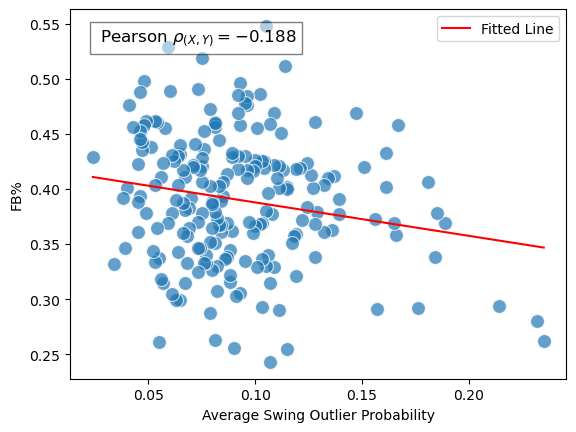

In [46]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress, pearsonr

X = batter_outlier_avg_fg_stats["avg_outlier_prob"]
y = batter_outlier_avg_fg_stats["FB%"]

slope, intercept, r_value, p_value, std_error = linregress(X,y)
r, pval = pearsonr(X,y)

X_val = np.linspace(X.min(), X.max(), 100)
y_val = intercept + slope * X_val

sns.scatterplot(x = X, y = y, s = 100, alpha = 0.7)
plt.plot(X_val, y_val, color='red', label = 'Fitted Line')

plt.xlabel("Average Swing Outlier Probability")
plt.ylabel("FB%")
plt.legend()

plt.gca().text(
    0.05, 0.95, 
    f' Pearson $\\rho_{{(X,Y)}} = {r:.3f}$',
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(facecolor='white', alpha=0.5)
)

## Player Analysis

In [14]:
jake_mccarthy = swings_2024[swings_2024["batter"] == 670032]

In [63]:
from baseball_utilities.display import *
set_pandas_display_all()
pd.set_option('display.max_rows', None)

In [15]:
jake_mccarthy

pitch_type   game_date  release_speed               player_name  \
2719           ST  2024-09-27           81.4             Hurter, Brant   
2720           ST  2024-09-27           81.6             Hurter, Brant   
2734           ST  2024-09-27           83.0             Hurter, Brant   
2748           SI  2024-09-27           93.3           Hanifee, Brenan   
5363           FF  2024-09-24           95.2              Burke, Brock   
5420           SI  2024-09-24           96.6         Kochanowicz, Jack   
5421           SI  2024-09-24           96.9         Kochanowicz, Jack   
5422           SI  2024-09-24           95.7         Kochanowicz, Jack   
10159          SL  2024-09-20           88.0           Morejon, Adrian   
10160          SI  2024-09-20           96.4           Morejon, Adrian   
10180          SL  2024-09-20           89.7             Scott, Tanner   
10214          ST  2024-09-20           81.0             Musgrove, Joe   
10215          FF  2024-09-20           92.4             Musgrove, Joe   
10244          FC  2024-09-20           89.1             Musgrove, Joe   
10245          ST  2024-09-20           83.3             Musgrove, Joe   
10266          CH  2024-09-20           89.1             Musgrove, Joe   
10267          ST  2024-09-20           83.1             Musgrove, Joe   
11965          FF  2024-09-18           91.2             Quijada, José   
11975          CH  2024-09-18           87.4            Fulmer, Carson   
11976          CH  2024-09-18           88.7            Fulmer, Carson   
11991          FF  2024-09-18           96.7         Kochanowicz, Jack   
11992          SI  2024-09-18           96.0         Kochanowicz, Jack   
12003          SI  2024-09-18           95.1         Kochanowicz, Jack   
12014          SI  2024-09-18           96.7         Kochanowicz, Jack   
12015          SI  2024-09-18           95.8         Kochanowicz, Jack   
13237          FF  2024-09-17           93.3        Strickland, Hunter   
13238          FF  2024-09-17           94.1        Strickland, Hunter   
13286          FF  2024-09-17           92.7          Canning, Griffin   
13304          CH  2024-09-17           87.6          Canning, Griffin   
13305          FF  2024-09-17           93.9          Canning, Griffin   
16310          FF  2024-09-14           94.3             Holman, Grant   
16322          FF  2024-09-14           92.7              Muller, Kyle   
16323          FF  2024-09-14           91.9              Muller, Kyle   
16355          SL  2024-09-14           84.8                Ginn, J.T.   
16356          SL  2024-09-14           85.0                Ginn, J.T.   
16357          CH  2024-09-14           87.1                Ginn, J.T.   
16383          SI  2024-09-14           94.1                Ginn, J.T.   
16393          SI  2024-09-14           93.3                Ginn, J.T.   
16394          SI  2024-09-14           93.4                Ginn, J.T.   
16395          SI  2024-09-14           93.5                Ginn, J.T.   
16396          SI  2024-09-14           92.8                Ginn, J.T.   
20736          SL  2024-09-10           86.9               Herrin, Tim   
20737          SI  2024-09-10           92.4               Herrin, Tim   
20758          SL  2024-09-10           86.6               Morgan, Eli   
20759          FF  2024-09-10           91.1               Morgan, Eli   
20776          CH  2024-09-10           82.2              Avila, Pedro   
20796          CU  2024-09-10           77.4               Lively, Ben   
20797          CH  2024-09-10           84.6               Lively, Ben   
23793          FC  2024-09-07           90.8            Jansen, Kenley   
23815          FF  2024-09-07           96.6            Shugart, Chase   
23816          ST  2024-09-07           80.0            Shugart, Chase   
23842          CH  2024-09-07           84.3          Criswell, Cooper   
23843          FC  2024-09-07           86.2          Criswell, Cooper   
23853      

In [16]:
jake_mccarthy.sort_values(by="outlier_prob", ascending=False)

pitch_type   game_date  release_speed               player_name  \
53404          FF  2024-08-12           97.9                 Gil, Luis   
35176          SI  2024-08-28           91.4            Chafin, Andrew   
168933         SL  2024-04-29           86.9                 Ryan, Joe   
181264         SI  2024-04-17           95.1              Zerpa, Angel   
136812         FS  2024-05-28           86.9            Gausman, Kevin   
60976          SL  2024-08-06           82.3          Alexander, Scott   
35241          FF  2024-08-28           98.5              Leiter, Jack   
155869         FF  2024-05-11           91.0         McKenzie, Triston   
148669         FF  2024-05-18           96.2                 Gil, Luis   
69707          FF  2024-07-29           91.6           Stratton, Chris   
68229          FF  2024-07-30           96.3            Harvey, Hunter   
122331         FS  2024-06-11           89.3              Stanek, Ryne   
172181         SI  2024-04-26           89.4           Ramírez, Erasmo   
141380         KC  2024-05-24           83.7            Kimbrel, Craig   
74919          FF  2024-07-25           92.5             Scherzer, Max   
56966          FC  2024-08-09           88.5          Taillon, Jameson   
125651         ST  2024-06-07           76.7          Criswell, Cooper   
169904         FS  2024-04-28           83.8             Littell, Zack   
126791         ST  2024-06-06           82.4             Houck, Tanner   
10244          FC  2024-09-20           89.1             Musgrove, Joe   
164268         SL  2024-05-04           87.3         Kittredge, Andrew   
29464          FC  2024-09-02           94.8            Burnes, Corbin   
158168         SI  2024-05-09           90.3               Lively, Ben   
97913          CH  2024-07-02           87.4          Carrasco, Carlos   
192503         FF  2024-04-07           94.5              Zerpa, Angel   
41385          FF  2024-08-23           94.7           Montero, Keider   
135420         SI  2024-05-29           91.9                Mayza, Tim   
78835          SI  2024-07-22           92.9         Lorenzen, Michael   
103437         SL  2024-06-27           89.6        Hernández, Daysbel   
138968         SI  2024-05-26           94.9             Bradish, Kyle   
97939          SL  2024-07-02           81.9          Carrasco, Carlos   
47955          SL  2024-08-17           85.2              Abreu, Bryan   
99592          SL  2024-06-30           91.9             Kinley, Tyler   
44021          SI  2024-08-21           93.2               Webb, Logan   
46795          SI  2024-08-18           96.0           Valdez, Framber   
126771         FC  2024-06-06           88.0               Booser, Cam   
49258          FF  2024-08-16           94.4       Arrighetti, Spencer   
77459          FF  2024-07-23           95.4                 Gray, Jon   
76206          FF  2024-07-24           94.6           Eovaldi, Nathan   
141416         FC  2024-05-24           95.9            Burnes, Corbin   
144234         SI  2024-05-22           94.5          Cabrera, Génesis   
181337         CU  2024-04-17           79.9            Anderson, Nick   
70759          SI  2024-07-28           93.4             Miller, Bryce   
126773         FF  2024-06-06           95.5               Booser, Cam   
117938         FC  2024-06-14           92.3              Nelson, Ryne   
125615         SI  2024-06-07           87.8          Criswell, Cooper   
126793         FS  2024-06-06           87.4             Houck, Tanner   
113434         SL  2024-06-18           84.0             Scott, Tayler   
67031          FF  2024-07-31           98.9              Erceg, Lucas   
49257          CU  2024-08-16           78.3       Arrighetti, Spencer   
16394          SI  2024-09-14           93.4                Ginn, J.T.   
171018         CU  2024-04-27           76.7             Civale, Aaron   
112212         FC  2024-06-19           91.5             Brown, Hunter   
125618     

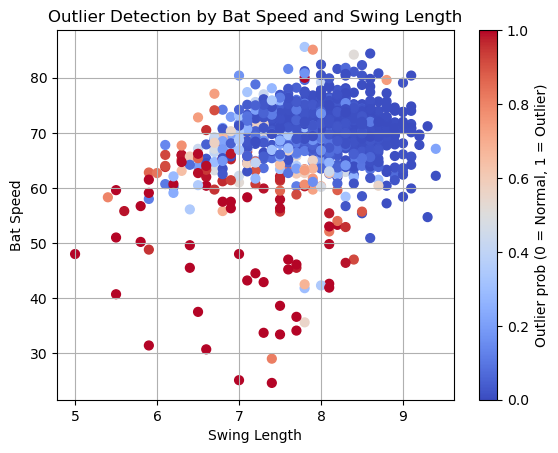

In [76]:
plt.scatter(
    x = jake_mccarthy["swing_length"],
    y = jake_mccarthy["bat_speed"],
    c = jake_mccarthy["outlier_prob"],
    cmap= "coolwarm",
    s = 40,
    vmin = 0,
    vmax = 1)
plt.colorbar(label = "Outlier prob (0 = Normal, 1 = Outlier)")
plt.xlabel("Swing Length")
plt.ylabel("Bat Speed")
plt.title("Outlier Detection by Bat Speed and Swing Length")
plt.grid(True)
plt.show()

## Variable Effect

/Users/jaminkim/anaconda3/envs/pymc_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


R^2: -0.114
RMSE: 0.0627


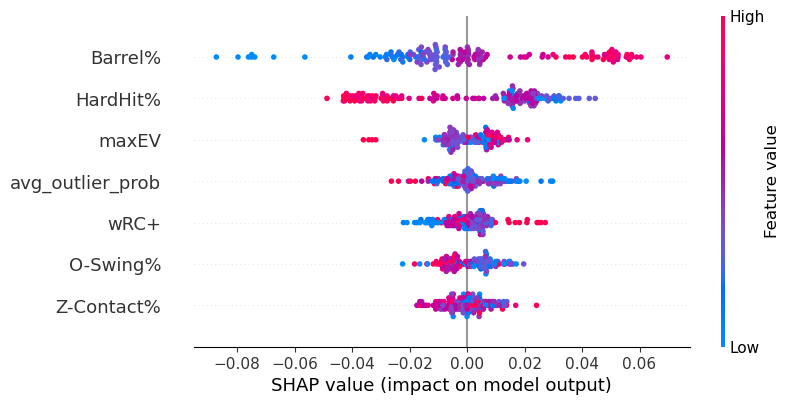

In [47]:
import pandas as pd
import numpy as np
import xgboost as xgb
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

X = batter_outlier_avg_fg_stats[["avg_outlier_prob", "Z-Contact%", "O-Swing%", "Barrel%", "wRC+", "maxEV", "HardHit%"]]
y = batter_outlier_avg_fg_stats.loc[X.index, "FB%"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=1,
    random_state=100
)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R^2: {r2:.3f}")
print(f"RMSE: {rmse:.4f}")

explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_train)

shap.plots.beeswarm(shap_values)


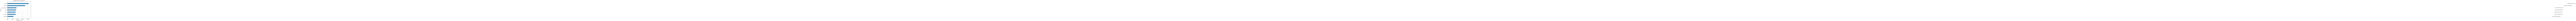

In [141]:
xgb.plot_importance(xgb_model, importance_type='gain', height=0.4)
plt.title("XGBoost Feature Importance")
plt.show()